In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import imutils
import pytesseract

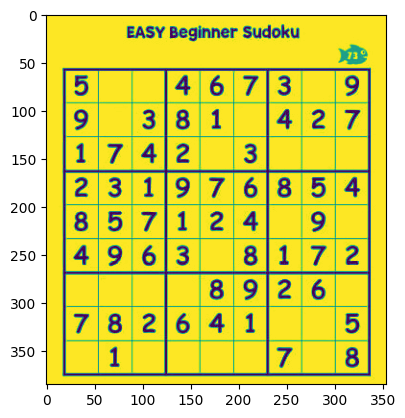

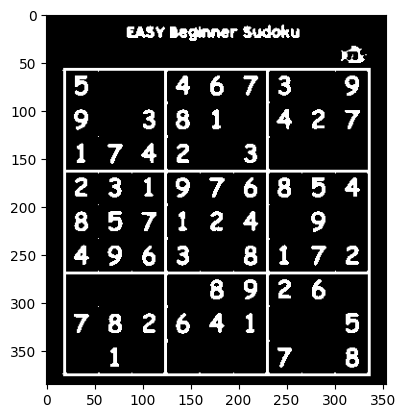

len(cnts) 2
len(cnts) 117
(385, 354)
7571.666666666667
15143.333333333334
841.2962962962963
1682.5925925925926
min_area 7571.666666666667 max_area 15143.333333333334
102082.0
10802.5
area 10802.5


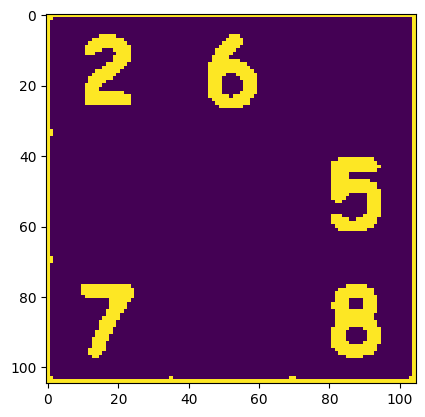

217.0
34.0
18.0
104.0
150.5
178.0
41.0
123.5
10799.5
area 10799.5


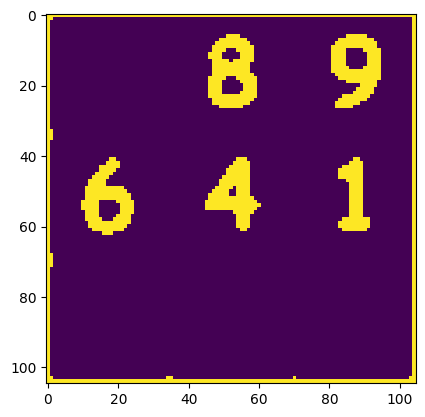

84.5
144.0
8.5
178.0
40.0
186.5
42.5
215.5
33.0
20.0
10704.0
area 10704.0


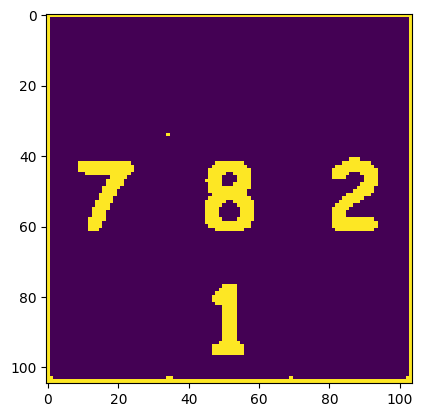

81.5
213.0
36.0
18.5
99.5
120.5
0.0
10802.0
area 10802.0


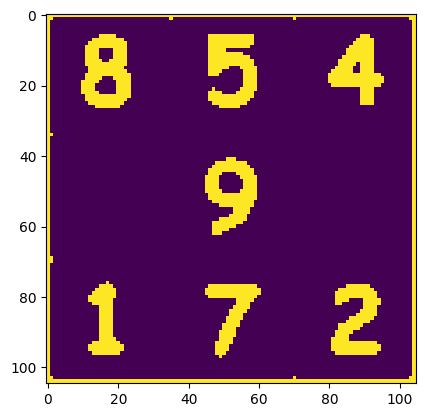

127.0
101.0
90.0
190.0
45.5
143.0
8.5
152.5
214.5
33.0
20.0
10801.0
area 10801.0


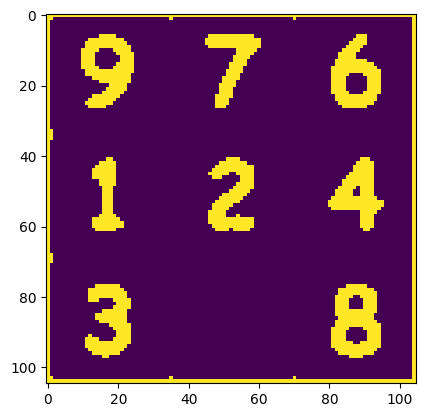

215.0
32.0
20.0
126.0
140.5
8.5
127.0
79.0
177.0
41.0
104.0
192.0
43.0
10706.0
area 10706.0


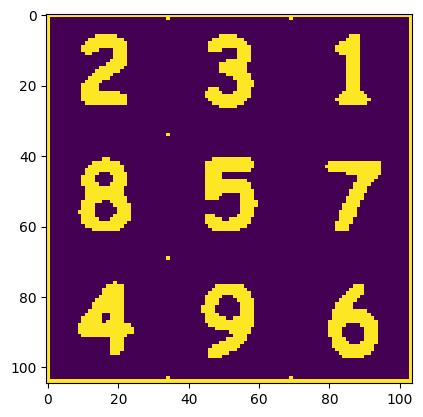

172.5
38.5
184.5
45.5
147.5
8.5
0.0
98.5
153.0
215.5
35.0
22.0
0.0
79.5
123.5
123.0
10804.5
area 10804.5


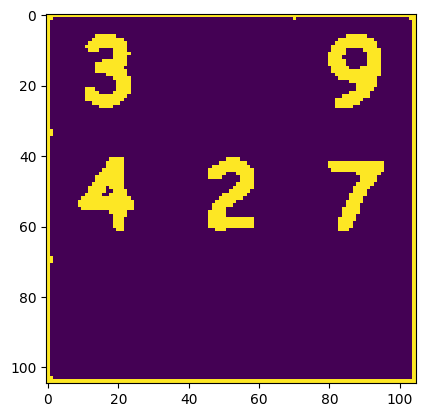

94.5
118.5
139.0
8.5
189.5
42.5
119.0
10805.0
area 10805.0


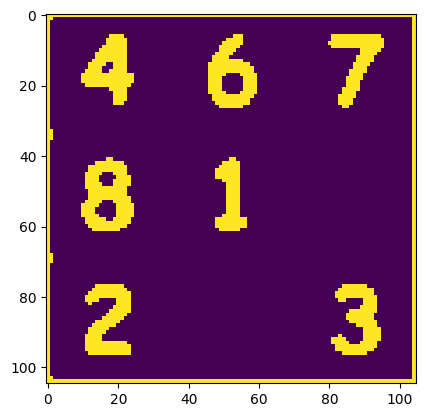

120.5
126.5
86.5
219.0
35.0
21.0
104.5
178.0
41.0
145.0
11.0
10709.0
area 10709.0


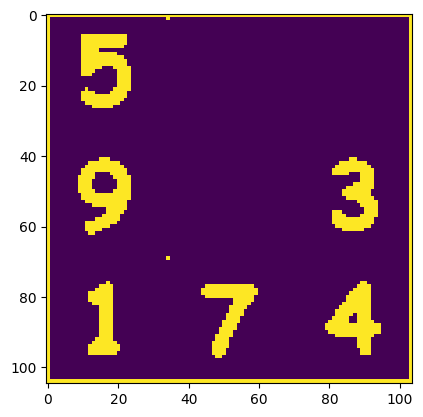

104.5
141.5
8.5
85.0
0.0
120.5
189.5
44.5
152.5
0.0
260.5
113.0
46.0
29.5
452.0
4.0
4.0
4.0
9.5
44.5
193.5
328.0
13.5
13.5
0


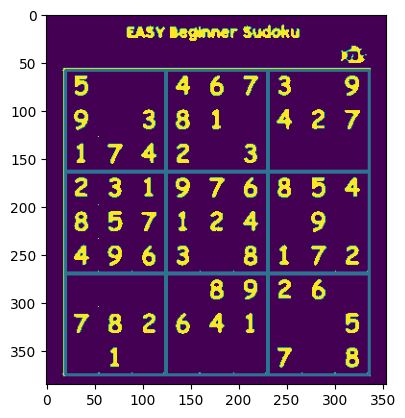

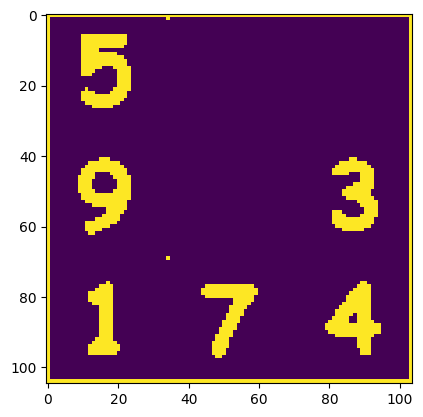

In [3]:
file = 'sudoku_1.jpeg'
# file = file_names[0]

im_or = cv2.imread(file)
img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
plt.imshow(img)
plt.show()
img = cv2.GaussianBlur(img,(3,3),0)
img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
plt.imshow(img, cmap = "gray")
plt.show()

cnts = cv2.findContours(img.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
print("len(cnts)", len(cnts))
cnts = imutils.grab_contours(cnts)
print("len(cnts)",len(cnts))
img_copy = img.copy()
print(img_copy.shape)

max_area = len(img_copy) * len(img_copy[0]) / 9
min_area = max_area / 2
print(min_area)
print(max_area)

cell_max_area = max_area / 9
cell_min_area = cell_max_area / 2
print(cell_min_area)
print(cell_max_area)

# min_area = 1000
# max_area = 50000
image_number = 0
print("min_area", min_area, "max_area", max_area)
box_9X9 = []
box_3X3 = []
for c in cnts:
    # print(c)
    area = cv2.contourArea(c)
    print(area)
    # print(area)
    if area > min_area and area < max_area:
        print("area", area)
        # print(image_number)
        x,y,w,h = cv2.boundingRect(c)
        ROI = img[y:y+h, x:x+w]
        box_3X3.append(ROI)
        plt.imshow(ROI)
        plt.show()
        # cv2.imwrite('ROI_{}.png'.format(image_number), ROI)
        cv2.rectangle(img_copy, (x, y), (x + w, y + h), (100,255,12), 2)
        image_number += 1
    elif area > cell_min_area and area < cell_max_area:
        x,y,w,h = cv2.boundingRect(c)
        ROI = img[y:y+h, x:x+w]
        plt.imshow(ROI)
        plt.show()
        box_9X9.append(ROI)
print(len(box_9X9))
box_3X3 = box_3X3[::-1]
box_9X9 = box_9X9[::-1]

plt.imshow(img_copy)
plt.show()
plt.imshow(ROI)
plt.show()

In [4]:
box_3X3_value = np.array([[None for i in range(9)] for j in range(9)])

print(len(box_3X3))
print(len(box_9X9))
extra_pixel = 3


if len(box_9X9) == 81:
    for k in range(81):
        ROI = box_9X9[k]
        l = len(ROI)
        b = len(ROI[1])
        temp_img = ROI[extra_pixel : l - extra_pixel, extra_pixel: b - extra_pixel]
        fetched_digit = pytesseract.image_to_string(temp_img, config='--psm 13 outputbase digits')
        if fetched_digit:
            m, n = k//9, k%9
            print(m,n)
            # print(m,n)
            box_3X3_value[n, m] = int(fetched_digit.strip("\n").strip("."))
        
    
else:
    for k in range(9):
        ROI = box_3X3[k]
        l = len(ROI)
        b = len(ROI[1])
        for i in range(3):
            for j in range(3):
                temp_img = ROI[i * int(l/3) + extra_pixel :int(l/3) * (i+1) - extra_pixel, j * int(b/3) + extra_pixel: (j+1) * int(b/3) - extra_pixel]
                fetched_digit = pytesseract.image_to_string(temp_img, config='--psm 13 outputbase digits')
                if fetched_digit:
                    m, n = k//3, k%3
                    # print(m,n)
                    box_3X3_value[j + (n*3), i+(m*3)] = int(fetched_digit.strip("\n").strip("."))

9
0


In [5]:
def solve_sudoku(sudoku):
    def get_3X3(i, j):
        return sudoku[3*(i//3): 3*(i//3 + 1), 3*(j//3): 3*(j//3 + 1)].reshape(9)

    def get_horizontal(i):
        return sudoku[i]

    def get_vertical(j):
        return sudoku[:, j]

    def get_missing(li):
        org_val = np.arange(1, 10)
        return np.setdiff1d(org_val, li)

    prev_len = len(sudoku[sudoku == None])
    curr_len = -1

    while curr_len != 0 and prev_len != curr_len:
        # print(prev_len, curr_len)
        prev_len = len(sudoku[sudoku == None])
        for i in range(9):
            for j in range(9):
                if sudoku[i, j] is None:
                    val_3X3 = get_3X3(i, j)
                    val_horizontal = get_horizontal(i)
                    val_vertical = get_vertical(j)

                    result = np.concatenate((val_3X3, val_horizontal, val_vertical), axis=-1)
                    result = np.unique(result[result != None])
                    # print(result)
                    missing_val = get_missing(result)
                    # print(missing_val)
                    if len(missing_val) == 1:
                        sudoku[i, j] = missing_val[0]
        curr_len = len(sudoku[sudoku == None])
        # print(prev_len, curr_len)
    return sudoku

# # Example usage
# sudo_or = np.array([
#     [5, None, None, 4, 6, 7, 3, None, 9],
#     [9, None, 3, 8, 1, None, 4, 2, 7],
#     [1, 7, 4, 2, None, 3, None, None, None],
#     [2, 3, 1, 9, 7, 6, 8, 5, 4],
#     [8, 5, 7, 1, 2, 4, None, 9, None],
#     [4, 9, 6, 3, None, 8, 1, 7, 2],
#     [None, None, None, None, 8, 9, 2, 6, None],
#     [7, 8 , 2, 6, 4, 1, None, None, 5],
#     [None, 1, None, None, None, None, 7, None, 8]
# ])
print(box_3X3_value)
solved_sudoku = solve_sudoku(box_3X3_value)
print(solved_sudoku)

[[5 9 1 2 8 4 None 7 None]
 [None None 7 3 5 9 None 8 1]
 [None 3 4 1 7 6 None 2 None]
 [4 8 2 9 1 3 None 6 None]
 [6 1 None 7 2 None 8 4 None]
 [7 None 3 6 4 8 9 1 None]
 [3 4 None 8 None 1 2 None 7]
 [None 2 None 5 9 7 6 None None]
 [9 7 None 4 None 2 None 5 8]]
[[5 9 1 2 8 4 3 7 6]
 [2 6 7 3 5 9 4 8 1]
 [8 3 4 1 7 6 5 2 9]
 [4 8 2 9 1 3 7 6 5]
 [6 1 9 7 2 5 8 4 3]
 [7 5 3 6 4 8 9 1 2]
 [3 4 5 8 6 1 2 9 7]
 [1 2 8 5 9 7 6 3 4]
 [9 7 6 4 3 2 1 5 8]]


In [6]:
# For Visualizing

line_broad = 3
line_slim = 1
cell_width = 99
size = (cell_width * 3) + (line_broad*4) + (line_slim * 6)
print(size)
sudo_img = np.zeros([size,size],dtype=np.uint8)
sudo_img.fill(255)

# Make Grids

# Horizontal Grids

# gappings = cell_width + line_broad + 2*line_slim
gappings = 0

# Border line
gappings += line_broad
sudo_img[0:gappings].fill(0)
sudo_img[-gappings:].fill(0)
sudo_img[:, 0:gappings].fill(0)
sudo_img[:, -gappings:].fill(0)

# 1st Slim line
gappings += cell_width//3
sudo_img[gappings : (gappings + line_slim)].fill(0)
sudo_img[-(gappings + line_slim): -(gappings)].fill(0)
sudo_img[:, gappings: gappings + line_slim].fill(0)
sudo_img[:, -(gappings + line_slim): -gappings].fill(0)

# 2st Slim line
gappings += cell_width//3
gappings += line_slim
sudo_img[gappings : gappings + line_slim].fill(0)
sudo_img[-(gappings + line_slim): -(gappings)].fill(0)
sudo_img[:, gappings: gappings + line_slim].fill(0)
sudo_img[:, -(gappings + line_slim): -gappings].fill(0)

# 1st Broad line
gappings += cell_width//3
gappings += line_broad
sudo_img[gappings : gappings + line_broad].fill(0)
sudo_img[-(gappings + line_broad): -(gappings)].fill(0)
sudo_img[:, gappings: gappings + line_broad].fill(0)
sudo_img[:, -(gappings + line_broad): -gappings].fill(0)

# 3rd Slim line
gappings += cell_width//3
gappings += line_slim
sudo_img[gappings : gappings + line_slim].fill(0)
sudo_img[-(gappings + line_slim): -(gappings)].fill(0)
sudo_img[:, gappings: gappings + line_slim].fill(0)
sudo_img[:, -(gappings + line_slim): -gappings].fill(0)

font = cv2.FONT_HERSHEY_SIMPLEX
for i in range(len(box_3X3_value)):
    for j in range(len(box_3X3_value[0])):
        if j < 3:
            gapping_j = -2
        elif j < 6:
            gapping_j = 3
        else:
            gapping_j = 7
            
        if i < 3:
            gapping_i = 5
        elif i < 6:
            gapping_i = 5
        else:
            gapping_i = 7
        if solved_sudoku[i,j]:
            cv2.putText(sudo_img, str(solved_sudoku[i,j]), (gapping_i + i*35,(j+1)*33 + gapping_j), font, 1, 0, 1, cv2.LINE_AA)

# print(sudo_img)
# plt.imshow(sudo_img, cmap = "gray")


315


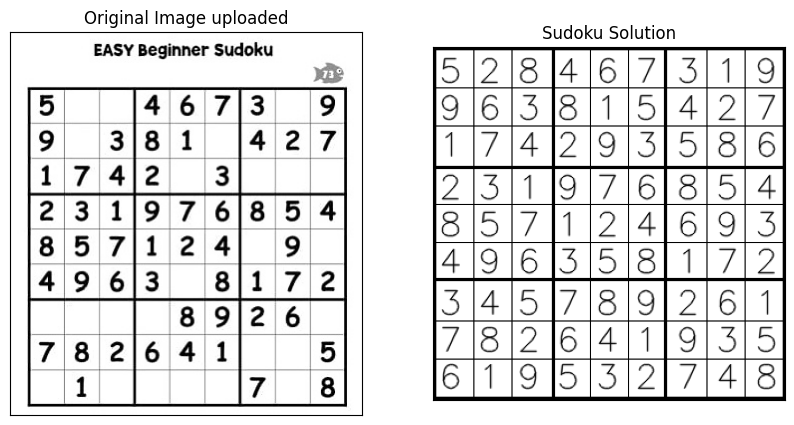

In [8]:

fig = plt.figure()

fig.set_size_inches(10,5)
ax1 = fig.add_subplot(1,2,1)
ax1.title.set_text("Original Image uploaded")
ax1.set_xticks([])
ax1.set_yticks([])
ax1.imshow(im_or)
ax2 = fig.add_subplot(1,2,2)
ax2.title.set_text("Sudoku Solution")
ax2.set_xticks([])
ax2.set_yticks([])
ax2.imshow(sudo_img, cmap = "gray")
fig.savefig('temp.png', dpi=fig.dpi)